(-50.0, 600.0)

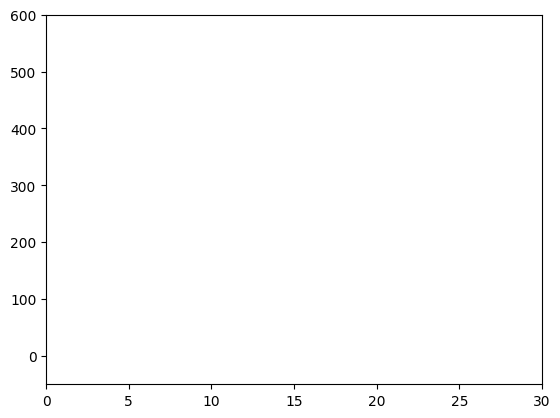

In [23]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import time
import os
from sympy import symbols, pi, cos, sin, summation, exp, sinh, sqrt

os.environ['ffmpeg'] = 'E:/ffmpeg/ffmpeg-7.0.2-essentials_build/bin/ffmpeg'
plt.rcParams['animation.ffmpeg_path'] = 'E:/ffmpeg/ffmpeg-7.0.2-essentials_build/bin/ffmpeg'
plt.rcParams['savefig.bbox'] = 'tight'

l = 30
b = np.pi**2 / l**2 / 2
a = 1

x_range = np.linspace(0, l, 60)
t_range = np.linspace(0, 500, 15000)

def compute_y(x, t):
    part1 = 30 * (1 - np.exp(-t / 5)) * np.sinh(np.sqrt(b) / a * (l - x)) / np.sinh(np.sqrt(b) / a * l)
    
    sum1, sum2 = 0, 0

    k = 1
    term1 = (2000 * (np.cos(np.pi * k) - 1) / (np.pi * k * (k ** 2 - 4)) * np.exp(-0.005 * (k ** 2 + 1) * t) 
             - 12 * np.pi * k * a ** 2 / (b * l ** 2 + np.pi ** 2 * k ** 2 * a ** 2) 
             * (1 / (np.pi ** 2 * k ** 2 / l ** 2 + b - 1 / 5)) 
             * (np.exp(-t / 5) - np.exp(-(np.pi ** 2 * k ** 2 / l ** 2 + b) * t)))
    sum1 += term1 * np.sin(np.pi * k * x / l)

    for k in range(3, 101):
        term1 = (2000 * (np.cos(np.pi * k) - 1) / (np.pi * k * (k ** 2 - 4)) * np.exp(-0.005 * (k ** 2 + 1) * t) 
                 - 12 * np.pi * k * a ** 2 / (b * l ** 2 + np.pi ** 2 * k ** 2 * a ** 2) 
                 * (1 / (np.pi ** 2 * k ** 2 / l ** 2 + b - 1 / 5)) 
                 * (np.exp(-t / 5) - np.exp(-(np.pi ** 2 * k ** 2 / l ** 2 + b) * t)))
        sum2 += term1 * np.sin(np.pi * k * x / l)
    
    return part1 + sum1 + sum2

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=1,)
ax.set_xlim(0, 30)
ax.set_ylim(-50, 600)

In [21]:
y_x = np.array([[compute_y(x, t) for x in x_range] for t in t_range])

In [24]:
text = ax.text(25, 500, '', 
               horizontalalignment='center', 
               verticalalignment='center',  
               fontsize=12)
def update_plot(frame):
    new_y = y_x[frame-1]
    line.set_data(x_range, new_y)
    text.set_text(f't=: {t_range[frame-1]:.2f}')
    return line, text

ani = animation.FuncAnimation(
    fig, update_plot, frames=15000, interval=1
)
Writer = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
print(Writer.bin_path())
ani.save('animation3.mp4', writer=Writer)
# Показываем анимацию
plt.show()

E:/ffmpeg/ffmpeg-7.0.2-essentials_build/bin/ffmpeg


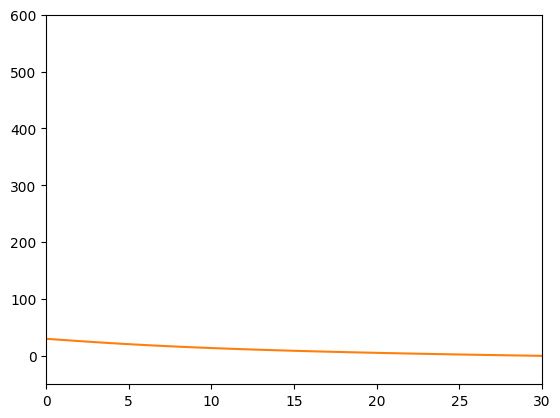

In [26]:
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=1,)
ax.set_xlim(0, 30)
ax.set_ylim(-50, 600)
y_x = [compute_y(x, 50000) for x in x_range]
ax.plot(y_x, x_range)
plt.show()